In [24]:
from dotenv import load_dotenv
load_dotenv()
import os
from openai import OpenAI

client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY"),  # This is the default and can be omitted
)
import cv2
import base64

In [25]:
video = cv2.VideoCapture("ForBiggerEscapes.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

361 frames read.


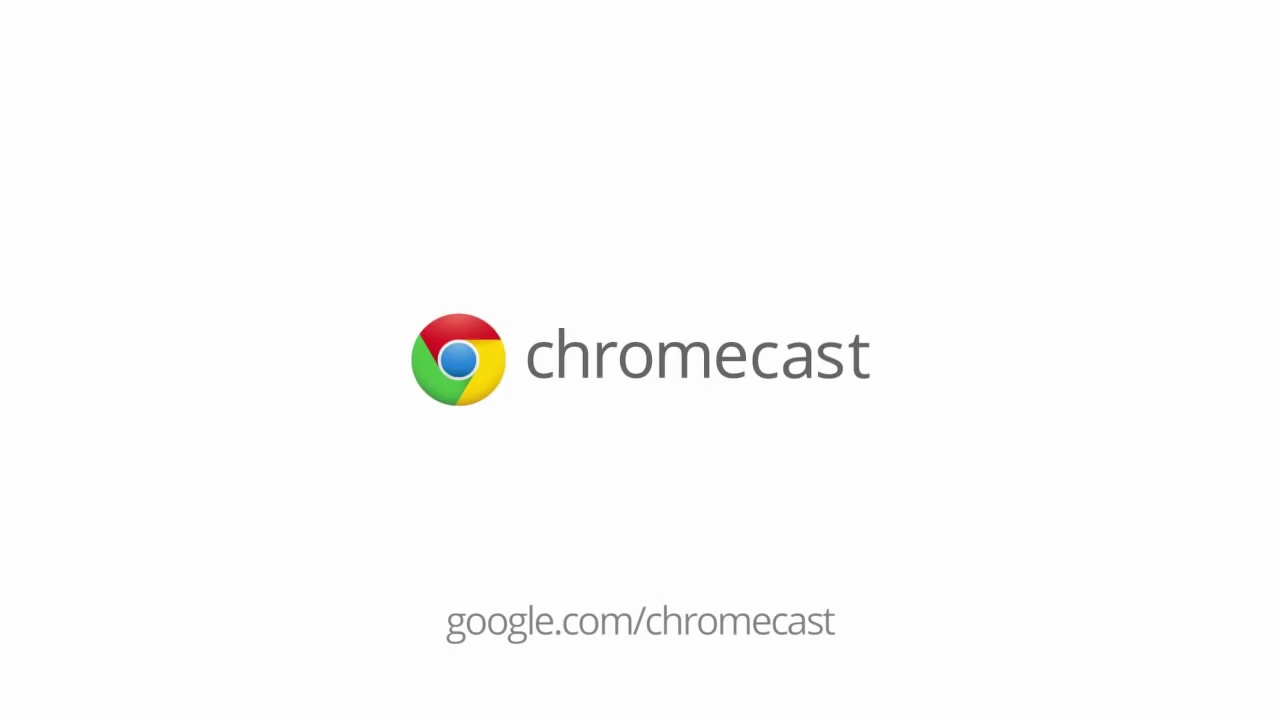

In [31]:
import time
from IPython.display import display, Image, Audio

display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [32]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

Experience the future of entertainment with seamless streaming right at your fingertips! Dive into action-packed moments and edge-of-your-seat drama, all from the comfort of your home. Whether it’s the adrenaline rush of an epic escape or sharing exciting adventures with friends, see everything you love in stunning clarity. Elevate your viewing experience effortlessly. Don't miss out—watch it now and transform the way you enjoy your favorite content! 🌟📺 #StreamingRevolution #EntertainmentElevated


In [34]:
import requests

response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {os.environ['OPENAI_API_KEY']}",
    },
    json={
        "model": "tts-1-1106",
        "input": result.choices[0].message.content,
        "voice": "onyx",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)